# Importing the dependencies

In [72]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Loading the image

In [73]:
image = mpimg.imread('/content/drive/My Drive/Self_Driving_Car/test.jpg')
print('This image is: ',type(image), 
         'with dimensions:', image.shape)

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
print(ysize,xsize)

This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)
540 960


In [74]:
# Making a copy of the image
color_select = np.copy(image)
line_image = np.copy(image)
region_select = np.copy(image)

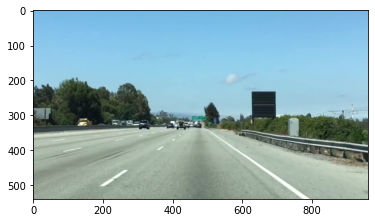

In [75]:
#display the image
plt.imshow(color_select)

# Color Selection

In [76]:
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

In [77]:
# Define the vertices of a triangular mask.
#these values must be set in trial and error basis
left_bottom = [0, 539]
right_bottom = [900, 539]
apex = [475, 320]

In [78]:
# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

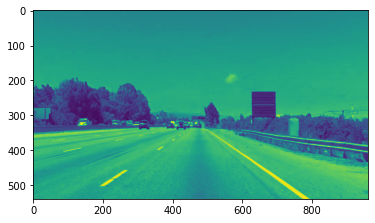

In [79]:
plt.imshow(image[:,:,0])
plt.show()

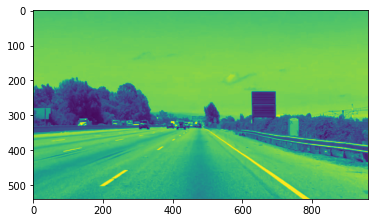

In [80]:
plt.imshow(image[:,:,1])
plt.show()

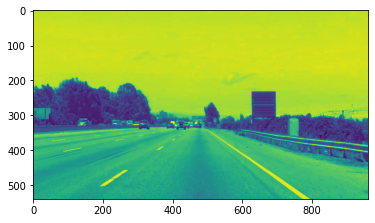

In [81]:
plt.imshow(image[:,:,2])
plt.show()

In [82]:
#grey scale images cannot be used more becuase the clarity is difficult for interpretation
# Identify pixels below the threshold, so they are picking up only one channel
#they are being set to 0 because they
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]


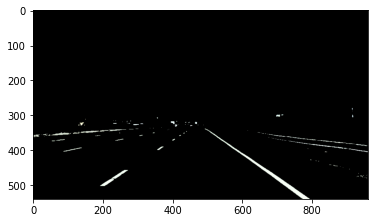

In [83]:
# Display the image                 
plt.imshow(color_select)
plt.show()

# Region Selection

np.meshgrid - used to create a rectangular grid out of two given one-dimensional arrays representing the cartesian indexing or matrix indexing

In [84]:
# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

In [96]:
region_select[region_thresholds] = [255, 0, 0]
# Mask color and region selection
color_select[thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~thresholds & region_thresholds] = [255, 0, 0]


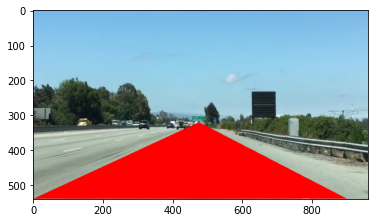

In [97]:
# Display the image                 
plt.imshow(region_select)
plt.show()

# Color Region

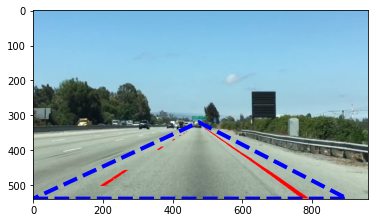

In [101]:
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)
plt.imshow(color_select)
plt.imshow(line_image)

# Color and Region Combined

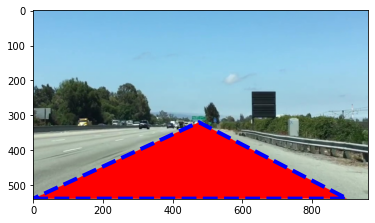

In [100]:
# Display the image and show region and color selections
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)
plt.imshow(color_select)
plt.imshow(region_select)